# Neural Networks

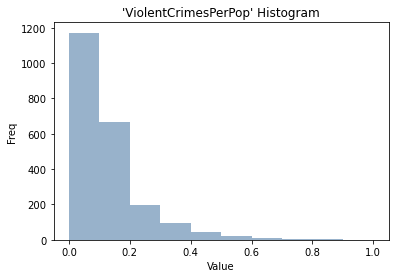

(1549, 100)
(665, 100)


In [1]:
%run Preprocessing.ipynb

In [2]:
# import the required packages
import seaborn as sns
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score # StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# # Grid search Packages
# from sklearn.preprocessing import LabelEncoder
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# from keras.optimizers import SGD

Using TensorFlow backend.
/Users/emilybirch/opt/anaconda3/envs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/emilybirch/opt/anaconda3/envs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/emilybirch/opt/anaconda3/envs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [3]:
# Set train and test sets
x_train = x_train
y_train = y_train
x_test = x_test
y_test = y_test

# Set classes based on classification complexity decided in pre-processing
classes = {'LowCrime': 0, 'HighCrime': 1}

**Preprocessing**

- Check that that transformations are distributed to have a mean value 0 and standard deviation of 1.

In [5]:
# Transform x features
sc = StandardScaler()
sc.fit(x_train)
X_train = sc.transform(x_train)
sc = StandardScaler()
sc.fit(x_test)
X_test = sc.transform(x_test)

In [6]:
# check the data
print(X_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1549, 100) (665, 100) (1549,) (665,)


**Results of grid search (GridSearchCV()) to tune hyperparameters found:**

1. The optimizer providing the best model accuracy is 'Adagrad'.
2. The optimal learning rate and momentum are: is 'learn_rate': 0.3 and 'momentum': 0.0 (when using stochastic gradient descent).
3. Use epochs=50 and batch size=5 to find the minima more quickly, reducing computational running time. Plus to allow the model to not learn patterns. 
4. Use a dropout rate for regularisation of 0.7 and a maxnorm 3 kernel weight constraint, to improve the model's ability to generalise.
5. Set the number of neurons to between 1-15 (had the highest accuracy scores) to control the representational capacity of the NN. 

NOTE: See extra code for grid search tunning (commented out)

**Fit model**

In [7]:
# Neural Network model function
def create_model(optimizer='Adagrad', init='glorot_uniform', neurons=12, dropout_rate=0.2):
    # create model
    model = Sequential()
    # Adding more layers by trial and error
    model.add(Dense(neurons, input_dim=100, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(4)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid')) 
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

classifier = KerasClassifier(build_fn = create_model, batch_size = 5, epochs = 50, verbose=0)

# Fit Model to the training data
train_pred = classifier.fit(X_train, y_train)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



**Perform k-fold validation**
- Accuracy: 85%
- Standard Deviation: 0.02
- NOTE: Plot commented out because computationally too slow (optimal fold is 11)

In [ ]:
# kf =KFold(n_splits=10, shuffle=True, random_state=42)
# kfold_scores = {}
# for i in range(2,12):
#    kfold = StratifiedKFold(n_splits=10, shuffle=True)
#    classifier = KerasClassifier(build_fn = create_model, batch_size = 5, epochs = 50, verbose=0)
#    accuracies = cross_val_score(classifier, X_train, y_train, cv= kf)
#    res = {str(i): accuracies.mean()}
#    kfold_scores.update(res)
#
# for key in kfold_scores:
#    plt.bar([key], kfold_scores[key], label=key, color=(0.2, 0.4, 0.6, 0.6))
#
# plt.title('K-Fold vs Test Data Accuracy')
# plt.xlabel('K')
# plt.ylabel('Accuracy')
# plt.ylim(0.7, 0.9)
# plt.show()

In [8]:
# Check k-fold validation
kf =KFold(n_splits=11, shuffle=True, random_state=42)
score = cross_val_score(classifier, X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')
print(f'Standard Deviation in score: {"{:.2f}".format(score.std())}')

Scores for each fold are: [0.87943262 0.80851064 0.85106383 0.82978723 0.88652482 0.85106383
 0.85815603 0.85106383 0.85106383 0.81428571 0.83571429]
Average score: 0.85
Standard Deviation in score: 0.02


**Compare train and test predictions**

- Training Accuracy: 87.54%
- Testing Accuracy: 86.92%

In [9]:
# Compare train & test data
y_train_pred = classifier.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_test_pred = classifier.predict(X_test)
y_test_pred = (y_test_pred > 0.5)

print(f'Neural Network Train Model Accuracy(in %): {accuracy_score(y_train_pred,y_train)*100}')
print(f'Neural Network Test Model Accuracy(in %): {accuracy_score(y_test_pred,y_test)*100}')

Neural Network Train Model Accuracy(in %): 87.54034861200775
Neural Network Test Model Accuracy(in %): 86.9172932330827


In [10]:
# Get classification report for train
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92      1148
         1.0       0.80      0.69      0.74       401

    accuracy                           0.88      1549
   macro avg       0.85      0.82      0.83      1549
weighted avg       0.87      0.88      0.87      1549



In [12]:
# Get classification report for test
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91       512
         1.0       0.71      0.74      0.72       153

    accuracy                           0.87       665
   macro avg       0.81      0.82      0.82       665
weighted avg       0.87      0.87      0.87       665



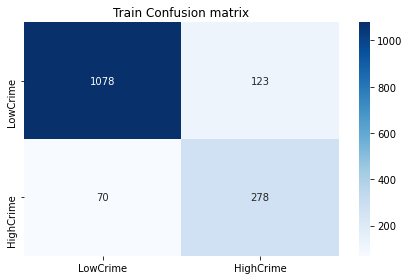

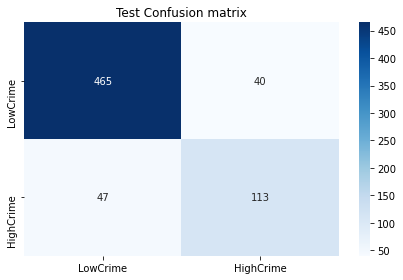

In [13]:
# Function for plotting confusion matrix
def plot_confusion_matrix(train_p, train, dom):
    cf = confusion_matrix(train_p,train)
    sns.heatmap(cf,annot=True,yticklabels=classes,xticklabels=classes,cmap='Blues', fmt='g')
    plt.title(f'{dom} Confusion matrix')
    plt.tight_layout()
    # plt.savefig(f'{dom} Confusion matrix.png')
    plt.show()
    
# Plot confusion matrix
plot_confusion_matrix(y_train_pred,y_train,dom='Train')
plot_confusion_matrix(y_test_pred,y_test,dom='Test')

## Extra code
**How grid search for hyperparameter tuning was carried out**

Using the GridSearchCV() class from scikit learn to find the hyperparameters that give the best model accuracy.


1. to find the best optimizer 
2. to tune learning rate and momentum
3. to tune the number of neurons 
4. to tune dropout regularisation
5. to tune the number of epochs and batch size

In [ ]:
# grid search tuning to find best optimizer

# def create_model(optimizer='adam', init='glorot_uniform'):
    # create model
  #  model = Sequential()
    # adding more layers by trial and error
  #  model.add(Dense(30, input_dim=100, kernel_initializer=init, activation='relu'))
  #  model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
   # print(model.summary())
    # Compile model
  #  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  #  return model


# create model
# model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# param_grid = dict(optimizer=optimizer)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)
# summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
  #  print("%f (%f) with: %r" % (mean, stdev, param))

output: Best: 0.852206 using {'optimizer': 'Adagrad'}

In [ ]:
# grid search to tune learning rate and momentum

# create the model again and set these 
# from keras.optimizers import SGD
# Function to create model, required for KerasClassifier
# def create_model(learn_rate=0.01, momentum=0):
    # create model
   # model = Sequential()
  #  model.add(Dense(12, input_dim=100, activation='relu'))
  #  model.add(Dense(1, activation='sigmoid'))
    # Compile model
  #  optimizer = SGD(lr=learn_rate, momentum=momentum)
  #  model.compile(loss='binary_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
  #  return model

# create model
# model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=5, verbose=0)
# define the grid search parameters
# learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
# momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
# param_grid = dict(learn_rate=learn_rate, momentum=momentum)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)
# summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
   # print("%f (%f) with: %r" % (mean, stdev, param))

output: Best: 0.858054 using {'learn_rate': 0.3, 'momentum': 0.0}

In [ ]:
# gridsearch to tune the number of neurons

# from keras.layers import Dropout
# from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
# def create_model(neurons=1):
    # create model
  #  model = Sequential()
  #  model.add(Dense(neurons, input_dim=100, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(4)))
  #  model.add(Dropout(0.2))
  #  model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
  #  model.compile(loss='binary_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
  #  return model

# create model
# model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=5, verbose=0)
# define the grid search parameters
# neurons = [1, 5, 10, 15, 20, 25, 30]
# param_grid = dict(neurons=neurons)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)
# summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
  #  print("%f (%f) with: %r" % (mean, stdev, param))

output: Best: 0.850611 using {'neurons': 1}

highest accuracy scores between 1-15 neurons.

In [ ]:
# grid search to tune dropout regularisation rate

# from keras.layers import Dropout
# from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
# def create_model(dropout_rate=0.0, weight_constraint=0):
    # create model
   # model = Sequential()
   # model.add(Dense(12, input_dim=100, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(weight_constraint)))
   # model.add(Dropout(dropout_rate))
   # model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
   # return model

# create model
# model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=5, verbose=0)
# define the grid search parameters
# weight_constraint = [1, 2, 3, 4, 5]
# dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)
# summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
 #   print("%f (%f) with: %r" % (mean, stdev, param))


output: Best: 0.850611 using {'dropout_rate': 0.7, 'weight_constraint': 3}

higher weight constraints (3-5) with dropout rates of 0.6-0.8 gave the best accuracy scores.

In [ ]:
# to tune the epochs and batch size
# too computationally slow to run

# from sklearn.model_selection import GridSearchCV
# optimizers = ['rmsprop', 'adam']
# init = ['glorot_uniform', 'normal', 'uniform']
# epochs = [50, 100, 150]
# batches = [5, 10, 20]
# param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init)
# grid = GridSearchCV(estimator=model, param_grid=param_grid)
# grid_result = grid.fit(X, Y)
# summarize results of grid search for best epoch, batch and optimizer
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
  #  print("%f (%f) with: %r" % (mean, stdev, param))